In [3]:
#Importing the libraries 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

2022-12-17 16:23:40.277048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Reading the data 

dataset = pd.read_csv('istanbul_stock_exchange.csv')

dataset.head()

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
# Creating a graph that specifically focuses on BOVESPA stocks from Jan. 5, 2009 to Feb. 17, 2011

figure = make_subplots(specs=[[{"secondary_y":False}]])

figure.add_trace(go.Scatter(x=dataset['date'],y=dataset['BOVESPA'].rolling(window=28).mean(),name="BOVESPA"),secondary_y=False,)

figure.update_layout(autosize=False,width=700,height=500,title_text="Istanbul Stock (BOVESPA)")

figure.update_xaxes(title_text="date")

figure.update_yaxes(title_text="prices",secondary_y=False)

figure.show() 

In [ ]:
n=len(dataset)

data=dataset[0:(n//10)*9]

test_data=dataset[(n//10)*9:]

In [ ]:
# The data being tested

test_data[0:59]

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
477,2-Dec-10,0.011764,0.016953,0.012737,0.013163,0.021929,0.017907,0.002607,0.019000,0.011648
478,3-Dec-10,-0.001179,0.004103,0.002600,-0.001422,-0.003874,0.000963,0.003432,-0.001359,0.002134
479,6-Dec-10,0.012661,0.010357,-0.001299,0.000958,0.004342,-0.001090,-0.003072,-0.000185,0.002951
480,7-Dec-10,0.002380,0.008157,0.000515,0.006811,0.006598,-0.002573,-0.003082,0.008135,0.001069
481,8-Dec-10,-0.002491,-0.012462,0.003695,-0.003726,-0.002413,0.008956,-0.016915,0.001569,-0.007650
482,9-Dec-10,-0.026805,-0.031853,0.003835,-0.001680,0.002327,0.005220,-0.004351,0.002307,0.000968
483,10-Dec-10,-0.017676,-0.020090,0.005984,0.006014,0.000861,-0.007213,0.006798,0.000681,-0.000892
484,13-Dec-10,0.024729,0.022188,0.000048,0.003309,0.008189,0.007992,0.011406,0.005687,0.005150
485,14-Dec-10,0.001946,0.004689,0.000911,-0.000283,0.005174,0.002220,-0.005556,0.002945,0.002971
486,15-Dec-10,-0.015310,-0.026703,-0.005136,-0.001571,-0.001529,-0.000678,-0.012781,-0.003067,-0.005434


In [ ]:
# Separate the rest of the data from the test data

print(len(data))

print(len(test_data))

477
59


In [ ]:
# Convert String to float for "date"

dataset['date'] = pd.to_datetime(dataset['date'])    

dataset['date'] = (dataset['date'] - dataset['date'].min())  / np.timedelta64(1,'D') 

In [ ]:
# Preprocessing the data for BOVESPA specifically

scaler = MinMaxScaler(feature_range = (0,1))

scaled_dataset = scaler.fit_transform(dataset['BOVESPA'].values.reshape(-1,1))

scaled_dataset

array([[0.72287474],
       [0.61856885],
       [0.1525905 ],
       [0.69816331],
       [0.37474687],
       [0.        ],
       [0.48810786],
       [0.11516276],
       [0.71542303],
       [0.49911309],
       [0.34595474],
       [0.11008249],
       [0.7427819 ],
       [0.31339212],
       [0.51096568],
       [0.54137276],
       [0.49958141],
       [0.78692064],
       [0.33236132],
       [0.38516492],
       [0.31927791],
       [0.69213271],
       [0.53904995],
       [0.66284109],
       [0.79166226],
       [0.32631208],
       [0.27549817],
       [0.38294666],
       [0.38564144],
       [0.70043817],
       [0.49173982],
       [0.04267113],
       [0.42075822],
       [0.46973407],
       [0.23775748],
       [0.35102741],
       [0.45774413],
       [0.45774413],
       [0.44617466],
       [0.45841226],
       [0.01261963],
       [0.51222905],
       [0.89699898],
       [0.22595368],
       [0.39747813],
       [0.37394312],
       [0.9201516 ],
       [0.459

In [ ]:
# Chose a random number for predicted days for our predicition results

predicted_days = 30

# Create X and Y train Data structures

X_train = []

Y_train = []

for i in range(predicted_days, len(scaled_dataset)):
    X_train.append(scaled_dataset[i - predicted_days:i, 0])
    Y_train.append(scaled_dataset[i, 0])
X_train = np.array(X_train) 
Y_train = np.array(Y_train)

In [ ]:
print(X_train.shape)

print(Y_train.shape)

(506, 30)
(506,)


In [ ]:
# Reshaping the data

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(506, 30, 1)

In [ ]:
# In order to create a LSTM model, we had to import libraries that pertain to the model, and then add different layers to LSTM model

regressor = Sequential() 

regressor.add(LSTM(units= 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 50)) 
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


In [ ]:
# This is to fit the model 

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, Y_train, epochs = 10, batch_size = 32)

Epoch 1/10
16/16 [==============================] - 47s 92ms/step - loss: 0.0577
Epoch 2/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0197
Epoch 3/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0189
Epoch 4/10
16/16 [==============================] - 1s 79ms/step - loss: 0.0189
Epoch 5/10
16/16 [==============================] - 1s 85ms/step - loss: 0.0188
Epoch 6/10
16/16 [==============================] - 1s 75ms/step - loss: 0.0191
Epoch 7/10
16/16 [==============================] - 1s 80ms/step - loss: 0.0192
Epoch 8/10
16/16 [==============================] - 1s 74ms/step - loss: 0.0182
Epoch 9/10
16/16 [==============================] - 1s 79ms/step - loss: 0.0177
Epoch 10/10
16/16 [==============================] - 2s 96ms/step - loss: 0.0193


In [ ]:
# The inputs for our model that are being prepped for the model

actual_prices = test_data['BOVESPA'].values

total_dataset = pd.concat((data['BOVESPA'], test_data['BOVESPA']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-predicted_days:].values

model_inputs = model_inputs.reshape(-1,1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
# The predicted values will be implemented here with the days we predicted which was 30

x_test = []

for x in range(predicted_days,len(model_inputs)):

    x_test.append(model_inputs[x-predicted_days:x,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = regressor.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)

2/2 [==============================] - 5s 40ms/step


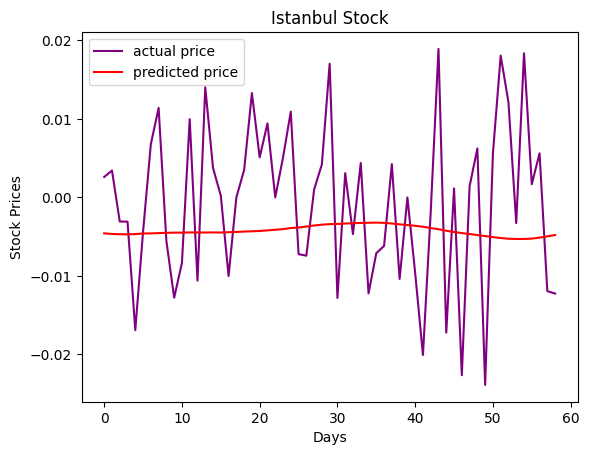

In [ ]:
# Finally create a plot for LSTM model in order to output of the results 

plt.plot(actual_prices, color='purple', label="actual price")

plt.plot(predicted_prices, color= 'red', label="predicted price")

plt.title("Istanbul Stock")

plt.xlabel("Days")

plt.ylabel("Stock Prices")

plt.legend()

plt.show()

In [ ]:
# The actual data from the predicted days being outputted

actual_data = [model_inputs[len(model_inputs)+1-predicted_days:len(model_inputs+1),0]]

actual_data = np.array(actual_data)

actual_data = np.reshape(actual_data,(actual_data.shape[0],actual_data.shape[1],1))

print(actual_data.shape)

(1, 29, 1)


In [ ]:
# The predicted results from the actual data of the predicted days 

prediction = regressor.predict(actual_data)

prediction = scaler.inverse_transform(prediction)

print("prediction: ", prediction)

1/1 [==============================] - 4s 4s/step
prediction:  [[-0.00478948]]
